# Avocados
Importando las librerías a usar:

In [75]:
from glob import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import numpy as np

Consolidando la información de los años 2017, 2018, 2019 y 2020 a la fecha:

files = glob('20*')
data = pd.concat((pd.read_csv(file) for file in files), ignore_index=True)
data.to_csv("consolidated_avocado.csv", index=False)

Leyendo nuestro archivo consolidado:

In [76]:
df = pd.read_csv('consolidated_avocado.csv', index_col=False)
df.head()

,Geography,Timeframe,Current Year Week Ending,Type,ASP Current Year,Total Bulk and Bags Units,4046 Units,4225 Units,4770 Units,TotalBagged Units,SmlBagged Units,LrgBagged Units,X-LrgBagged Units
0,Total U.S.,Weekly,2017/01/02 00:00,Conventional,0.89,38879716.85,12707894.99,14201200.68,549844.57,11420776.61,8551133.56,2802709.32,66933.73
1,Albany,Weekly,2017/01/02 00:00,Conventional,1.47,129948.23,4845.77,117027.41,200.36,7874.69,7866.86,7.83,0.00
2,Atlanta,Weekly,2017/01/02 00:00,Conventional,0.93,547565.88,224073.54,118926.37,337.48,204228.49,111599.58,92628.91,0.00
3,Baltimore/Washington,Weekly,2017/01/02 00:00,Conventional,1.47,631760.81,54530.42,408952.26,14387.01,153891.12,151345.59,2542.41,3.12
4,Boise,Weekly,2017/01/02 00:00,Conventional,0.92,104510.11,27845.16,9408.92,11341.75,55914.28,53093.47,2793.61,27.20


Limpieza de datos en el campo Tipo:

In [77]:
df['Type'] = df['Type'].str.strip()
df['Type'].unique()

array(['Conventional', 'Organic'], dtype=object)

## Análisis Exploratorio de Datos:

Explorando las geografías de Estados Unidos:

In [78]:
df['Geography'].unique()

array(['Total U.S.', 'Albany', 'Atlanta', 'Baltimore/Washington', 'Boise',
       'Boston', 'Buffalo/Rochester', 'California', 'Charlotte',
       'Chicago', 'Cincinnati/Dayton', 'Columbus', 'Dallas/Ft. Worth',
       'Denver', 'Detroit', 'Grand Rapids', 'Great Lakes',
       'Harrisburg/Scranton', 'Hartford/Springfield', 'Houston',
       'Indianapolis', 'Jacksonville', 'Las Vegas', 'Los Angeles',
       'Louisville', 'Miami/Ft. Lauderdale', 'Midsouth', 'Nashville',
       'New Orleans/Mobile', 'New York', 'Northeast',
       'Northern New England', 'Orlando', 'Philadelphia',
       'Phoenix/Tucson', 'Pittsburgh', 'Plains', 'Portland',
       'Raleigh/Greensboro', 'Richmond/Norfolk', 'Roanoke', 'Sacramento',
       'San Diego', 'San Francisco', 'Seattle', 'South Carolina',
       'South Central', 'Southeast', 'Spokane', 'St. Louis', 'Syracuse',
       'Tampa', 'West', 'West Tex/New Mexico'], dtype=object)

Seleccionando solamente los totales de Estados Unidos:

In [79]:
df_totalUS = df.loc[df['Geography'] == 'Total U.S.']
df_totalUS.head()

,Geography,Timeframe,Current Year Week Ending,Type,ASP Current Year,Total Bulk and Bags Units,4046 Units,4225 Units,4770 Units,TotalBagged Units,SmlBagged Units,LrgBagged Units,X-LrgBagged Units
0,Total U.S.,Weekly,2017/01/02 00:00,Conventional,0.89,38879716.85,12707894.99,14201200.68,549844.57,11420776.61,8551133.56,2802709.32,66933.73
54,Total U.S.,Weekly,2017/01/08 00:00,Conventional,0.99,38049802.62,11809727.70,13856934.70,539068.39,11844071.83,9332971.74,2432259.13,78840.96
108,Total U.S.,Weekly,2017/01/15 00:00,Conventional,0.98,38295488.31,12936858.36,12625665.39,579346.52,12153618.04,9445622.04,2638918.48,69077.52
162,Total U.S.,Weekly,2017/01/22 00:00,Conventional,0.94,42140393.39,14254150.46,14212881.66,908616.41,12764744.86,9462853.82,3231019.56,70871.48
216,Total U.S.,Weekly,2017/01/29 00:00,Conventional,0.96,39373579.25,14034075.77,11683464.54,818727.02,12837311.92,9918255.52,2799960.74,119095.66


Estructura de datos de la información Total de EU.

In [80]:
df_totalUS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378 entries, 0 to 20403
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Geography                  378 non-null    object 
 1   Timeframe                  378 non-null    object 
 2   Current Year Week Ending   378 non-null    object 
 3   Type                       378 non-null    object 
 4   ASP Current Year           378 non-null    float64
 5   Total Bulk and Bags Units  378 non-null    float64
 6   4046 Units                 378 non-null    float64
 7   4225 Units                 378 non-null    float64
 8   4770 Units                 378 non-null    float64
 9   TotalBagged Units          378 non-null    float64
 10  SmlBagged Units            378 non-null    float64
 11  LrgBagged Units            378 non-null    float64
 12  X-LrgBagged Units          378 non-null    float64
dtypes: float64(9), object(4)
memory usage: 41.3+ KB


Estadísticos de orden para Total EU:

In [81]:
df_mean = df_totalUS["ASP Current Year"].mean()
df_median = df_totalUS["ASP Current Year"].median()
df_std = df_totalUS["ASP Current Year"].std()

print(f"El precio promedio es de: {df_mean.round(4)}")
print(f"La mediana del precio es de: {df_median.round(4)}")
print(f"La desviación estándar del precio es de: {df_std.round(4)}")

El precio promedio es de: 1.362
La mediana del precio es de: 1.4
La desviación estándar del precio es de: 0.2826


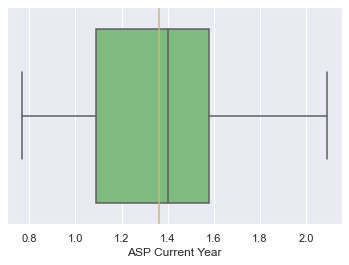

In [82]:
sns.set(style='darkgrid')
sns.boxplot(x=df_totalUS["ASP Current Year"], palette='Greens_r')
plt.axvline(df_totalUS["ASP Current Year"].mean(), c='y'); 

Percentiles del precio:

In [83]:

print(f'Valor mínimo: {df_totalUS["ASP Current Year"].min()}')
print(f'Percentil 0: {df_totalUS["ASP Current Year"].quantile(0)}')
print(f'Percentil 10: {df_totalUS["ASP Current Year"].quantile(0.1)}')
print(f'Percentil 25: {df_totalUS["ASP Current Year"].quantile(0.25)}')
print(f'Percentil 50: {df_totalUS["ASP Current Year"].median()}')
print(f'Percentil 75: {df_totalUS["ASP Current Year"].quantile(0.75)}')
print(f'Percentil 90: {df_totalUS["ASP Current Year"].quantile(0.9)}')
print(f'Percentil 100: {df_totalUS["ASP Current Year"].quantile(1)}')
print(f'Valor máximo: {df_totalUS["ASP Current Year"].max()}')

df_range = df_totalUS["ASP Current Year"].max() - df_totalUS["ASP Current Year"].min()
print(f"El rango del precio es de: {df_range.round(4)}")

Valor mínimo: 0.77
Percentil 0: 0.77
Percentil 10: 1.0
Percentil 25: 1.09
Percentil 50: 1.4
Percentil 75: 1.58
Percentil 90: 1.71
Percentil 100: 2.09
Valor máximo: 2.09
El rango del precio es de: 1.32


Tabla de frecuencias:

In [84]:
prices = df_totalUS["ASP Current Year"]

segmentos = pd.cut(prices, 20)

df_totalUS["ASP Current Year"].groupby(segmentos).count()

ASP Current Year
(0.769, 0.836]     1
(0.836, 0.902]     6
(0.902, 0.968]    11
(0.968, 1.034]    43
(1.034, 1.1]      38
(1.1, 1.166]      21
(1.166, 1.232]    31
(1.232, 1.298]    14
(1.298, 1.364]    14
(1.364, 1.43]     30
(1.43, 1.496]     21
(1.496, 1.562]    43
(1.562, 1.628]    42
(1.628, 1.694]    19
(1.694, 1.76]     12
(1.76, 1.826]     14
(1.826, 1.892]     8
(1.892, 1.958]     1
(1.958, 2.024]     4
(2.024, 2.09]      5
Name: ASP Current Year, dtype: int64

Histograma:

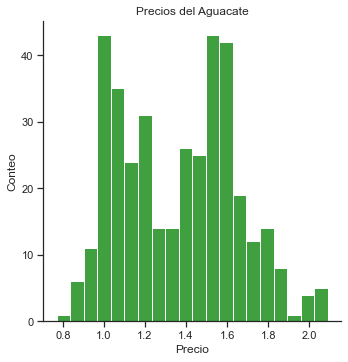

In [85]:
sns.set_style("ticks")
ax = sns.displot(x=df_totalUS["ASP Current Year"], bins=20, color="green");
ax.set(title="Precios del Aguacate", xlabel="Precio", ylabel="Conteo");

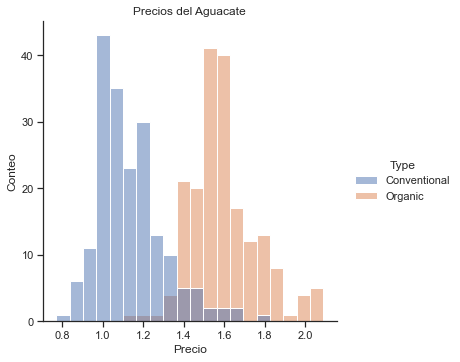

In [86]:
sns.set_style("ticks")
ax = sns.displot(x=df_totalUS["ASP Current Year"], bins=20, hue=df_totalUS["Type"]);
ax.set(title="Precios del Aguacate", xlabel="Precio", ylabel="Conteo");
sns.set_palette("tab10")

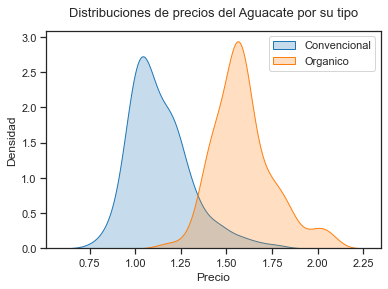

In [87]:
df_1 = df_totalUS.groupby(["ASP Current Year"], level=0).mean()
type = df_totalUS.groupby(level=0)["Type"].last()
merged = df_1.merge(type, left_index=True, right_index=True)
organic = df_1[merged["Type"] == 'Organic']
conventional = df_1[merged["Type"] == 'Conventional']

ax = sns.kdeplot(conventional["ASP Current Year"], label="Convencional",shade=True)
sns.kdeplot(organic["ASP Current Year"],shade=True, ax=ax, label="Organico")
ax.set_title('Distribuciones de precios del Aguacate por su tipo', fontsize=13, pad=15);
ax.set(xlabel="Precio")
ax.set(ylabel="Densidad")
ax.legend(loc='upper right');

In [88]:
#Add kurtosis? 

## Análisis de ventas:

Agregando dimensiones de tiempo:

In [89]:
df['year'] = pd.to_datetime(df['Current Year Week Ending']).dt.year
df['month'] = pd.to_datetime(df['Current Year Week Ending']).dt.month
df['week'] = pd.to_datetime(df['Current Year Week Ending']).dt.isocalendar().week

Agregando columna de ventas en dólares:

In [90]:
df['sales'] = (df['Total Bulk and Bags Units']*df['ASP Current Year'])/1000000

Agregando columna de kilogramos y toneladas:

In [91]:
df['kilograms'] = df['Total Bulk and Bags Units'] / 2.2046
df['tons'] = df['kilograms'] / 1000
df.head()

,Geography,Timeframe,Current Year Week Ending,Type,ASP Current Year,Total Bulk and Bags Units,4046 Units,4225 Units,4770 Units,TotalBagged Units,SmlBagged Units,LrgBagged Units,X-LrgBagged Units,year,month,week,sales,kilograms,tons
0,Total U.S.,Weekly,2017/01/02 00:00,Conventional,0.89,38879716.85,12707894.99,14201200.68,549844.57,11420776.61,8551133.56,2802709.32,66933.73,2017,1,1,34.602948,1.763572e+07,17635.723873
1,Albany,Weekly,2017/01/02 00:00,Conventional,1.47,129948.23,4845.77,117027.41,200.36,7874.69,7866.86,7.83,0.00,2017,1,1,0.191024,5.894413e+04,58.944130
2,Atlanta,Weekly,2017/01/02 00:00,Conventional,0.93,547565.88,224073.54,118926.37,337.48,204228.49,111599.58,92628.91,0.00,2017,1,1,0.509236,2.483743e+05,248.374254
3,Baltimore/Washington,Weekly,2017/01/02 00:00,Conventional,1.47,631760.81,54530.42,408952.26,14387.01,153891.12,151345.59,2542.41,3.12,2017,1,1,0.928688,2.865648e+05,286.564824
4,Boise,Weekly,2017/01/02 00:00,Conventional,0.92,104510.11,27845.16,9408.92,11341.75,55914.28,53093.47,2793.61,27.20,2017,1,1,0.096149,4.740547e+04,47.405475


Agregando columna de clasificación de Geografías, Distrito, Estado o Ciudad:

In [92]:
district_class = pd.read_csv("district_class.csv")
district_class

,Geography,district_class
0,Total U.S.,Total U.S.
1,South Central,District
2,West,District
3,California,District
4,Northeast,District
5,Southeast,District
6,Great Lakes,District
7,Midsouth,District
8,Los Angeles,City
9,Plains,District


Agregando clasificación entre Totales, Distritos y Ciudades.

In [93]:
merged = pd.merge(df,district_class)
merged.columns

Index(['Geography', 'Timeframe', 'Current Year Week Ending', 'Type',
       'ASP Current Year', 'Total Bulk and Bags Units', '4046 Units',
       '4225 Units', '4770 Units', 'TotalBagged Units', 'SmlBagged Units',
       'LrgBagged Units', 'X-LrgBagged Units', 'year', 'month', 'week',
       'sales', 'kilograms', 'tons', 'district_class'],
      dtype='object')

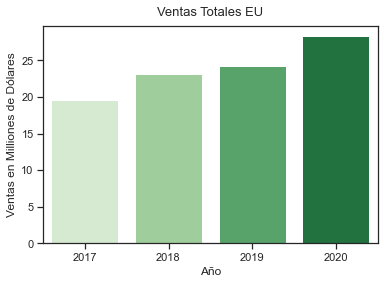

In [94]:
fig = plt.figure()
ax = fig.add_subplot()

df_1 = df.loc[df['Geography'] == 'Total U.S.']

sns.barplot(x=df_1['year'], y=df_1['sales'], ax=ax, ci=None, palette='Greens');

ax.set_ylabel('Ventas en Milliones de Dólares')
ax.set_xlabel('Año')
ax.set_title('Ventas Totales EU', fontsize=13, pad=10);

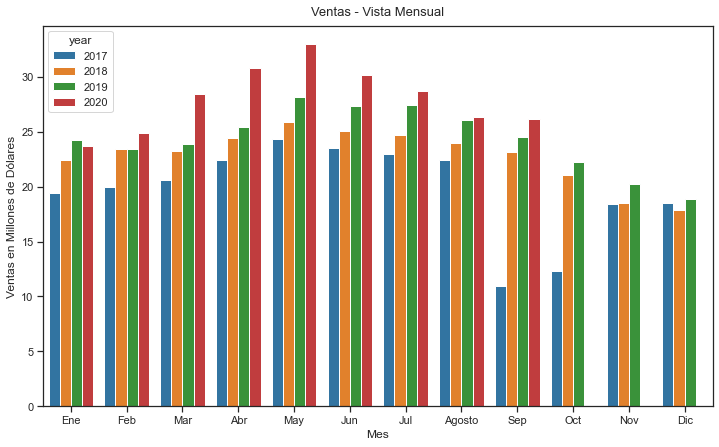

In [95]:
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot()

df_1 = df.loc[df['Geography'] == 'Total U.S.']

sns.barplot(x=df_1['month'], y=df_1['sales'], hue=df_1['year'], ci=None, ax=ax);

ax.set_ylabel('Ventas en Millones de Dólares')
ax.set_xlabel('Mes')
ax.set_xticklabels(['Ene','Feb','Mar','Abr','May','Jun','Jul','Agosto','Sep','Oct','Nov','Dic'])
ax.set_title('Ventas - Vista Mensual', fontsize=13, pad=10);

In [112]:
df_city = merged.loc[merged['year'] == 2020]
df_city = df_city.loc[df_city['district_class'] == "District"]
df.head()
#df_city = df_city.loc[df_city['district_class'] == "District"]
#df_city = df.groupby('Geography')['sales'].sum()
#df_city

,Geography,Timeframe,Current Year Week Ending,Type,ASP Current Year,Total Bulk and Bags Units,4046 Units,4225 Units,4770 Units,TotalBagged Units,SmlBagged Units,LrgBagged Units,X-LrgBagged Units,year,month,week,sales,kilograms,tons
0,Total U.S.,Weekly,2017/01/02 00:00,Conventional,0.89,38879716.85,12707894.99,14201200.68,549844.57,11420776.61,8551133.56,2802709.32,66933.73,2017,1,1,34.602948,1.763572e+07,17635.723873
1,Albany,Weekly,2017/01/02 00:00,Conventional,1.47,129948.23,4845.77,117027.41,200.36,7874.69,7866.86,7.83,0.00,2017,1,1,0.191024,5.894413e+04,58.944130
2,Atlanta,Weekly,2017/01/02 00:00,Conventional,0.93,547565.88,224073.54,118926.37,337.48,204228.49,111599.58,92628.91,0.00,2017,1,1,0.509236,2.483743e+05,248.374254
3,Baltimore/Washington,Weekly,2017/01/02 00:00,Conventional,1.47,631760.81,54530.42,408952.26,14387.01,153891.12,151345.59,2542.41,3.12,2017,1,1,0.928688,2.865648e+05,286.564824
4,Boise,Weekly,2017/01/02 00:00,Conventional,0.92,104510.11,27845.16,9408.92,11341.75,55914.28,53093.47,2793.61,27.20,2017,1,1,0.096149,4.740547e+04,47.405475


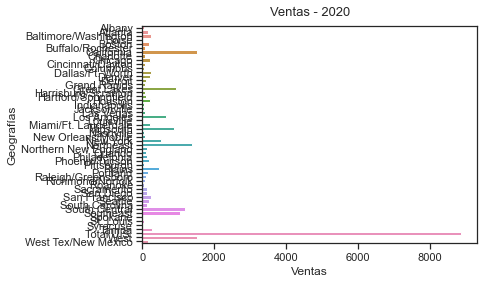

In [99]:
fig = plt.figure()
ax = fig.add_subplot()

sns.barplot(x=df_city, y=df_city.index, ax=ax);

ax.set_ylabel('Geografías')
ax.set_xlabel('Ventas')
ax.set_title('Ventas - 2020', fontsize=13, pad=10);

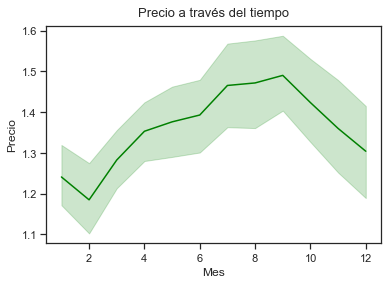

In [100]:
fig = plt.figure()
ax = fig.add_subplot()

sns.lineplot(data=df_1,
             x='month',
             y='ASP Current Year', ax=ax, color='green');

ax.set_ylabel('Precio')
ax.set_xlabel('Mes')
#ax.set_xticklabels(['Ene','Feb','Abr','Jun','Agosto','Oct','Dic'])
ax.set_title('Precio a través del tiempo', fontsize=13, pad=10);

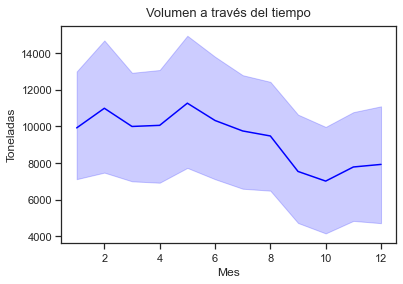

In [110]:
fig = plt.figure()
ax = fig.add_subplot()

sns.lineplot(data=df_1,
             x='month',
             y='tons', ax=ax, color='blue');

ax.set_ylabel('Toneladas')
ax.set_xlabel('Mes')
#ax.set_xticklabels(['Ene','Feb','Abr','Jun','Agosto','Oct','Dic'])
ax.set_title('Volumen a través del tiempo', fontsize=13, pad=10);

Text(0.5, 0, 'Mes')

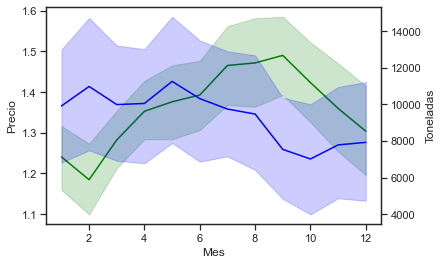

In [105]:
fig = plt.figure()
ax = fig.add_subplot()

sns.lineplot(data=df_1, x='month', y='ASP Current Year', ax=ax, color="green")
ax2 = plt.twinx()
sns.lineplot(data=df_1, x='month', y='tons', color="blue", ax=ax2);

ax.set_ylabel('Precio')
ax2.set_ylabel('Toneladas')
ax.set_xlabel('Mes')

<ipython-input-106-08a6beeb9f65>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Ene','Feb','Abr','Jun','Agosto','Oct','Dic'])


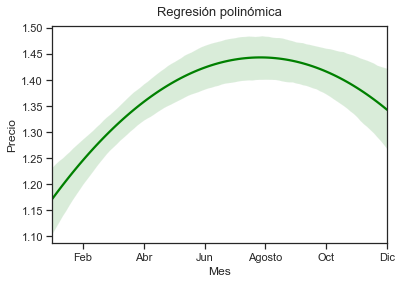

In [106]:
fig = plt.figure()
ax = fig.add_subplot()

sns.regplot( data=df_1,
             x='month',
             y='ASP Current Year', scatter=None, order=2, ax=ax, color='green');
ax.set_ylabel('Precio')
ax.set_xlabel('Mes')
ax.set_xticklabels(['Ene','Feb','Abr','Jun','Agosto','Oct','Dic'])
ax.set_title('Regresión polinómica', fontsize=13, pad=10);

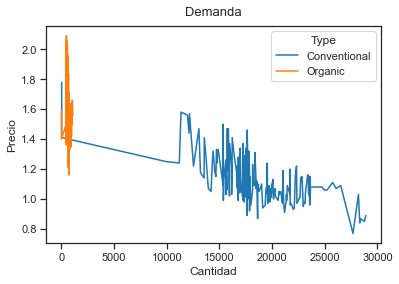

In [107]:
fig = plt.figure()
ax = fig.add_subplot()

sns.lineplot(data=df_1,
             x='tons',
             y='ASP Current Year', hue='Type', ax=ax);

ax.set_ylabel('Precio')
ax.set_xlabel('Cantidad')
ax.set_title('Demanda', fontsize=13, pad=10);

In [102]:
filtered = merged.loc[merged['district_class'] == "District"]
filtered.head(10)

,Geography,Timeframe,Current Year Week Ending,Type,ASP Current Year,Total Bulk and Bags Units,4046 Units,4225 Units,4770 Units,TotalBagged Units,SmlBagged Units,LrgBagged Units,X-LrgBagged Units,year,month,week,sales,kilograms,tons,district_class
2646,California,Weekly,2017/01/02 00:00,Conventional,0.89,7175276.66,2266313.37,2877688.31,90899.53,1940375.45,1762033.74,151333.95,27007.76,2017,1,1,6.385996,3.254684e+06,3254.684142,District
2647,California,Weekly,2017/01/08 00:00,Conventional,1.00,6653048.21,1988635.39,2569566.25,109029.01,1985817.56,1807926.97,144375.50,33515.09,2017,1,1,6.653048,3.017803e+06,3017.802871,District
2648,California,Weekly,2017/01/15 00:00,Conventional,0.93,6656554.36,2075029.62,2450277.12,95137.62,2036110.00,1910596.03,99912.91,25601.06,2017,1,2,6.190596,3.019393e+06,3019.393250,District
2649,California,Weekly,2017/01/22 00:00,Conventional,0.76,8153340.48,3089603.62,2659661.41,106559.24,2297516.21,2207074.93,61563.24,28878.04,2017,1,3,6.196539,3.698331e+06,3698.330981,District
2650,California,Weekly,2017/01/29 00:00,Conventional,0.76,8055482.07,3009291.31,2295856.21,148335.97,2601998.58,2504421.68,48343.02,49233.88,2017,1,4,6.122166,3.653943e+06,3653.942697,District
2651,California,Weekly,2017/02/05 00:00,Conventional,0.67,11213596.29,3986429.59,3550403.07,214137.93,3462625.70,3403581.49,7838.83,51205.38,2017,2,5,7.513110,5.086454e+06,5086.453910,District
2652,California,Weekly,2017/02/12 00:00,Conventional,0.79,6862176.64,2429385.13,1870884.97,158534.53,2403372.01,2247565.14,101368.24,54438.63,2017,2,6,5.421120,3.112663e+06,3112.662905,District
2653,California,Weekly,2017/02/19 00:00,Conventional,0.95,6194368.66,1999799.14,2098407.09,177817.01,1918345.42,1728825.22,145454.71,44065.49,2017,2,7,5.884650,2.809747e+06,2809.747192,District
2654,California,Weekly,2017/02/26 00:00,Conventional,0.95,6342089.92,2193499.50,2038284.77,155642.35,1954663.30,1870562.62,42309.14,41791.54,2017,2,8,6.024985,2.876753e+06,2876.753116,District
2655,California,Weekly,2017/03/05 00:00,Conventional,1.15,5634150.07,1961188.27,1720072.57,161251.98,1791637.25,1727384.52,9179.36,55073.37,2017,3,9,6.479273,2.555634e+06,2555.633707,District


<AxesSubplot:xlabel='year', ylabel='Geography'>

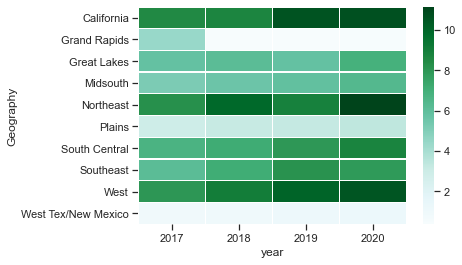

In [103]:
#need to figure out how to perform de classificacion.
pivot_1 = filtered.pivot_table(values='sales', columns='year', index='Geography', aggfunc='max')
sns.heatmap(pivot_1, cbar=True, cmap="BuGn", linewidths=0.3, annot=False)

In [104]:
merged.to_csv("consolidated_avocado_final.csv", index=False)